In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

In [70]:
std = pd.read_csv("Student_v2.csv")

In [71]:
std.head()

,PG_CGA,Year,GMAT score,UG CGPA,Number of friends,Number of classes present,Number of hours studied,Register Number
0,7.6950,1952,605,8.535304,155,32,4.903273,12808ABC
1,8.2393,1953,691,8.752756,82,30,4.513093,13288ABC
2,7.7858,1955,507,8.651894,134,29,5.114469,3438ABC
3,6.9845,1957,423,8.148109,107,26,5.153673,3167ABC
4,6.8772,1958,584,8.519016,192,25,4.583450,2966ABC


In [72]:
std.shape

(150, 8)

In [73]:
std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
PG_CGA                       150 non-null float64
Year                         150 non-null int64
GMAT score                   150 non-null int64
UG CGPA                      150 non-null float64
Number of friends            150 non-null int64
Number of classes present    150 non-null int64
Number of hours studied      150 non-null float64
Register Number              150 non-null object
dtypes: float64(3), int64(4), object(1)
memory usage: 9.5+ KB


In [74]:
std.describe()

,PG_CGA,Year,GMAT score,UG CGPA,Number of friends,Number of classes present,Number of hours studied
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,7.077224,1965.800000,608.133333,8.284005,148.186667,17.240000,5.491061
std,0.679552,7.561826,129.886459,0.450615,73.520703,7.640127,0.482024
min,6.043500,1952.000000,377.000000,7.017811,33.000000,4.000000,4.344806
25%,6.518700,1960.000000,538.250000,7.956388,89.500000,10.250000,5.203779
50%,7.021100,1966.000000,602.500000,8.297489,129.500000,16.500000,5.493907
75%,7.531975,1972.000000,700.750000,8.612294,187.000000,23.000000,5.870920
max,8.693700,1978.000000,833.000000,9.151705,295.000000,32.000000,6.556109


# Visualising the Data

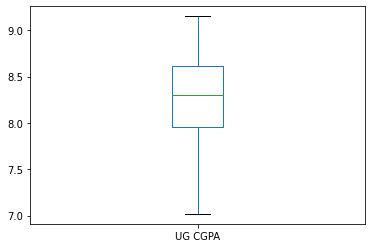

In [75]:
std['UG CGPA'].plot.box()
plt.show()

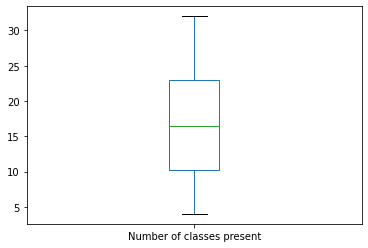

In [76]:
std['Number of classes present'].plot.box()
plt.show()

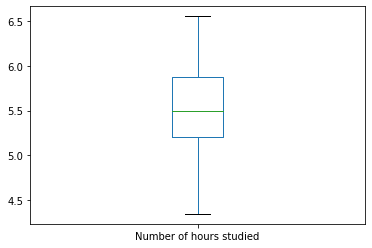

In [77]:
std['Number of hours studied'].plot.box()
plt.show()

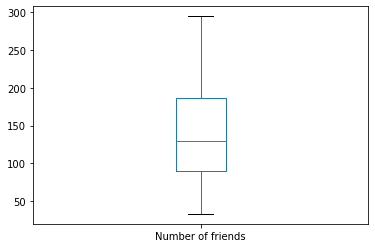

In [78]:
std['Number of friends'].plot.box()
plt.show()

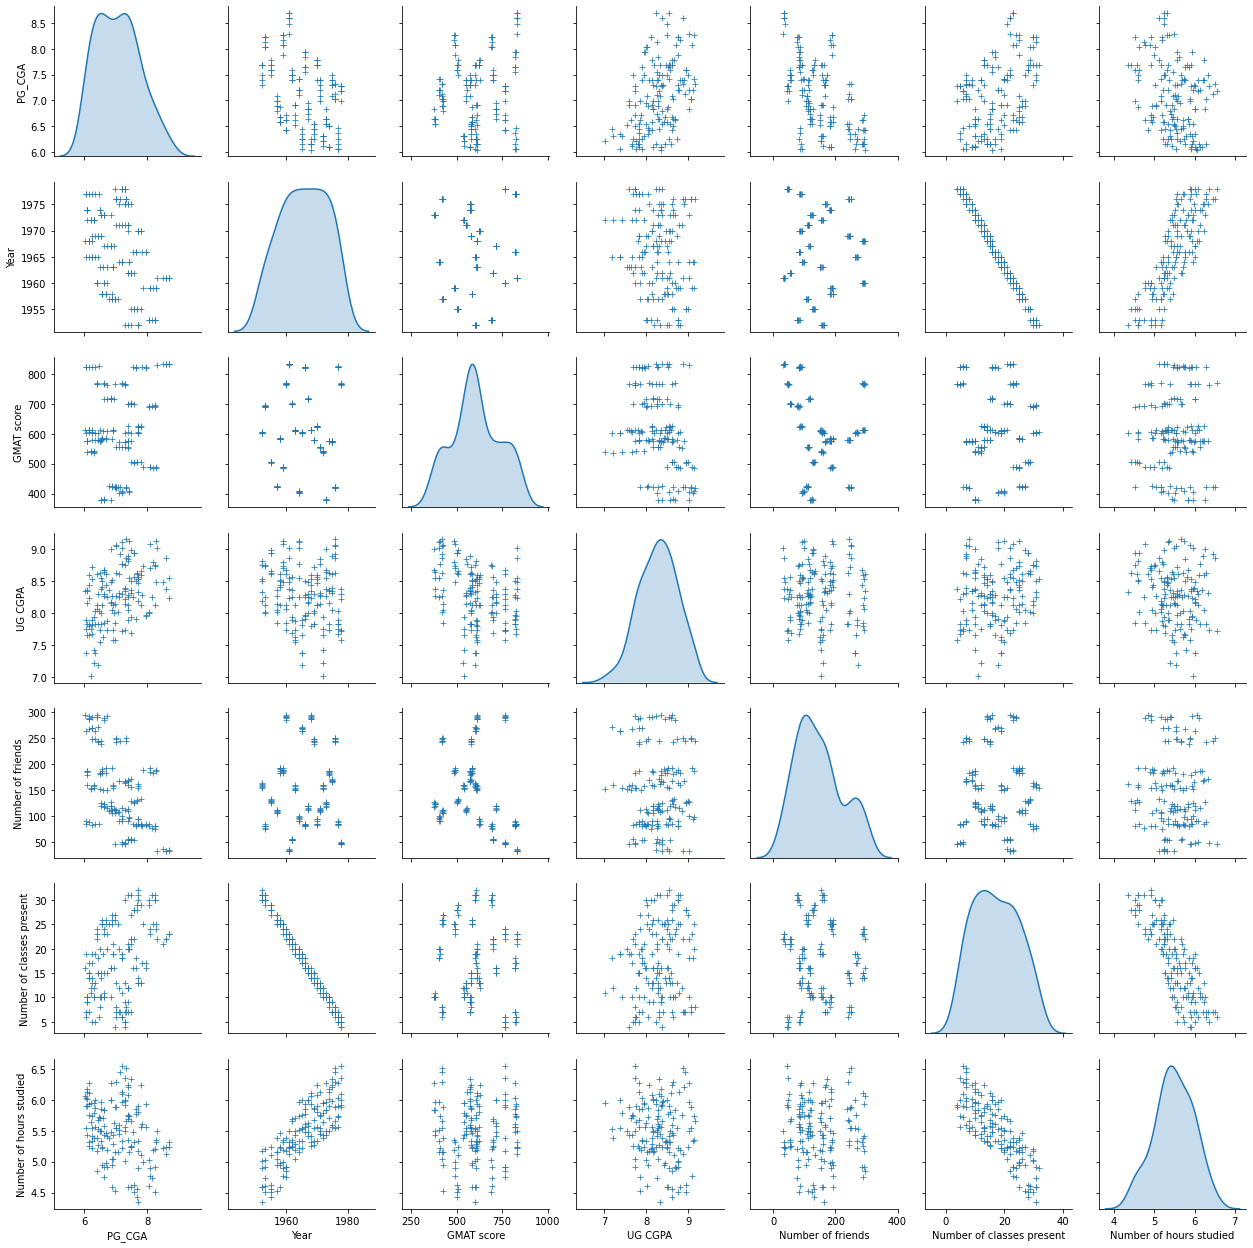

In [79]:
sns.pairplot(std, markers="+", diag_kind="kde")
plt.show()

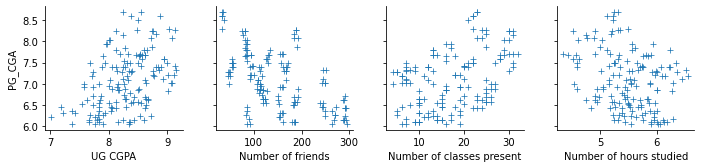

In [80]:
sns.pairplot(std, x_vars=['UG CGPA','Number of friends','Number of classes present','Number of hours studied'],y_vars='PG_CGA', markers="+", diag_kind="kde")
plt.show()

# Correlation between variables

In [81]:
cor = std.corr()
cor

,PG_CGA,Year,GMAT score,UG CGPA,Number of friends,Number of classes present,Number of hours studied
PG_CGA,1.000000,-0.428453,0.149223,0.442718,-0.553956,0.430445,-0.304735
Year,-0.428453,1.000000,0.017090,-0.174904,0.022377,-0.994839,0.815542
GMAT score,0.149223,0.017090,1.000000,-0.328864,-0.279612,-0.023920,0.033556
UG CGPA,0.442718,-0.174904,-0.328864,1.000000,-0.036063,0.171602,-0.133189
Number of friends,-0.553956,0.022377,-0.279612,-0.036063,1.000000,-0.022208,-0.019722
Number of classes present,0.430445,-0.994839,-0.023920,0.171602,-0.022208,1.000000,-0.813474
Number of hours studied,-0.304735,0.815542,0.033556,-0.133189,-0.019722,-0.813474,1.000000


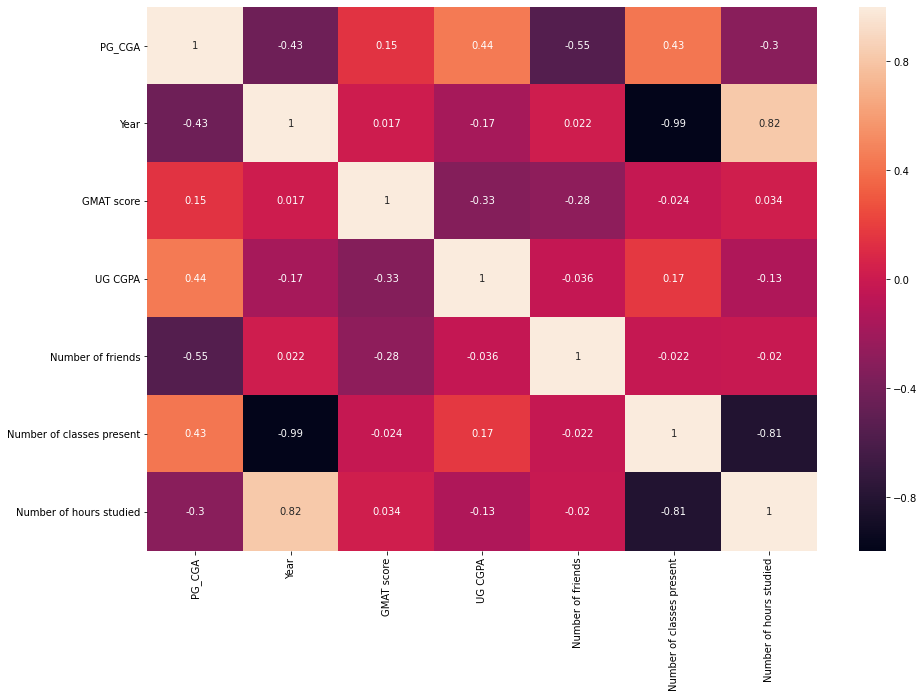

In [82]:
plt.subplots(figsize=(15,10))
sns.heatmap(cor, annot=True)
plt.show()

its visible from the pairplot and the heatmap, the variable Number of classes present and UG CGPA seems to be most correlated with PG_CGA.

## Performing Simple Linear Regression

In [83]:
X = std[['Number of classes present']]
y = std['PG_CGA']

Train-Test split

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

Regression model using SciKit Learn

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
#Instantiating the linear regression model
mod = LinearRegression()

In [88]:
mod.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
y_pred = mod.predict(X_test)

In [90]:
mod.intercept_, mod.coef_

(6.559904501941289, array([0.03217662]))

In [91]:
from sklearn.metrics import r2_score

In [92]:
r2_score(y_test,y_pred)

0.20298678861057662

## Performing Simple Multiple  linear Regression

In [93]:
std.drop('Register Number',axis=1,inplace=True)

In [94]:
X = std.drop( "PG_CGA",axis=1)
y = std["PG_CGA"]

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

mod = LinearRegression()
mod.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
y_pred = mod.predict(X_test)
y_pred

array([6.96220362, 6.05522775, 6.29953496, 7.38977326, 7.84986688,
       6.7200541 , 6.10966262, 7.30531099, 6.14096667, 7.89304169,
       7.50132759, 7.34456049, 6.19661348, 6.95479906, 6.9514919 ,
       6.88236711, 7.19065089, 6.97722152, 7.448242  , 7.9176633 ,
       7.43856025, 7.55563944, 8.16787684, 7.07953475, 7.02873133,
       6.4694942 , 7.8938433 , 6.54418768, 6.80295539, 7.29035556,
       6.72799203, 6.60657277, 6.35613879, 6.14048061, 7.06833864,
       6.80677939, 7.7648808 , 7.82541283, 7.21013775, 8.3617751 ,
       7.04661126, 7.40049866, 6.29432424, 7.09356495, 7.2731056 ])

In [97]:
import sklearn
sklearn.metrics.r2_score(y_test,y_pred)

0.7218481706224941

### The End